In [166]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException
import pandas as pd
import requests
from selenium.webdriver.common.desired_capabilities import DesiredCapabilities
from selenium.webdriver.common.action_chains import ActionChains
from selenium.common.exceptions import NoSuchElementException
import time
from time import sleep

import pyttsx3
import speech_recognition as sr


engine=pyttsx3.init('sapi5')
voices=engine.getProperty('voices')
engine.setProperty('voice',voices[0].id)

def speak(audio):
    engine.say(audio)
    engine.runAndWait()

pla=input()             #ENTER THE PLACE YOU WANT TO SEARCH




kiims


In [167]:
chrome = webdriver.Chrome("C:/Users/KIIT/Downloads/chromedriver.exe")
driver = chrome

wait = WebDriverWait(driver,10)
url = "https://www.google.com/maps/"
driver.get(url)
sleep(6)

driver.find_element_by_xpath("/html/body/jsl/div[3]/div[9]/div[3]/div[1]/div[1]/div[1]/div[2]/form/div/div[3]/div/input[1]").send_keys(pla)   #FILLS THE EMPTY PLACE WITH THE PLACE NAME WHICH YOU ARE SEARCHING
driver.find_element_by_xpath("/html/body/jsl/div[3]/div[9]/div[3]/div[1]/div[1]/div[1]/div[2]/div[1]/button").click()                         #AFTER FILLING THE DATA IT'S CLICKED AND SEARCHED
sleep(4)
speak("select whose review you want to find")            #SELECT BY YOUR OWN WHOSE REVIEW YOU WANT TO FIND

In [169]:

driver.find_element_by_xpath("/html/body/jsl/div[3]/div[9]/div[8]/div/div[1]/div/div/div[49]/div/div/button/span").click()


In [164]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid=SentimentIntensityAnalyzer()
positive=0
negative=0
neutral=0
arr=[]

last_height = driver.execute_script("return document.documentElement.scrollHeight")
while True:
    # Scroll down to bottom
    driver.execute_script("window.scrollTo(0, document.documentElement.scrollHeight);")

    # Wait to load page
    time.sleep(2)

    # Calculate new scroll height and compare with last scroll height
    new_height = driver.execute_script("return document.documentElement.scrollHeight")
    if new_height == last_height:
        break
    last_height = new_height

driver.execute_script("window.scrollTo(0, document.documentElement.scrollHeight);")
    
#while(driver.find_elements_by_class_name("//button[contains(text(), 'More')]")):
 #   driver.find_element_by_xpath("//button[contains(text(), 'More')]").click()

string = driver.find_elements_by_class_name("section-review-title")

sub=driver.find_elements_by_class_name("section-review-review-content")
num_of_names = len(string)

for i in range(num_of_names):   # .replace(",", "|")
    comment = sub[i].text 
    if '...' in comment:
        try:
            driver.find_element_by_xpath("//button[contains(text(), 'More')]").click()
        except Exception:
            pass
    
        

for i in range(num_of_names):
    username = string[i].text    # .replace(",", "|")
    comment = sub[i].text 


    print(username)
    print(comment)
    
    ss=sid.polarity_scores(comment)
    print(i)
    for k in ss:
        print(k,ss[k])
        arr.append(ss['compound'])
    if(ss['compound']>=0.05):
        print("Positive Sentiment")
        positive+=1
    elif(ss['compound']<=-0.05):
        print("negative Sentiment")
        negative+=1
    else:
        print("Neutral Sentiment")
        neutral+=1
    print("_"*100)
  

#print(string)
#print(sub)





Ranjan Patnaik
Very good staff. very cooperative. testing charges are as per the industry standard. But when you get admitted, they might drag the treatment process and charge you more which any hospital does. so be smart, take a person with good knowledge about the disease or process in order to but get cheated.

but if you have no issues with money, then without any doubt this is the best hospital you can get for treatment.
0
neg 0.116
neu 0.706
pos 0.178
compound 0.6668
Positive Sentiment
____________________________________________________________________________________________________
Dhirendra Panda
Kims hospital is part KIIT University,  based at Bhubaneswar. There is medical oncology unit. Two good doctors - Dr.Saroj Sahoo, Oncology Surgery and Dr.Jogamaya Pattnaik. Chemotherapy is economic.
1
neg 0.0
neu 0.9
pos 0.1
compound 0.4404
Positive Sentiment
____________________________________________________________________________________________________
Soumyakanta Bohidar
My wif

Raju Reddy
Hospital with no hospitality. Very poor kind of services provided by staff. There is no coordination among staffs during shift change. Evening shift staff does not know the does of medicine to be given to patient, calls morning shift staff for help. But morning shift does not pick the call.
15
neg 0.138
neu 0.814
pos 0.048
compound -0.624
negative Sentiment
____________________________________________________________________________________________________
Prasant panda
I am extremely dissatisfied with the staff behaviour specially those in the help desk and registration desk at diagnostic area...they are pathetic..Please teach them some behavioura ethics before you hire them..People give money for their …
16
neg 0.077
neu 0.851
pos 0.072
compound -0.0498
Neutral Sentiment
____________________________________________________________________________________________________
Bikash Patra
One of the best and huge private hospital of bhubaneswar
17
neg 0.0
neu 0.552
pos 0.448
com

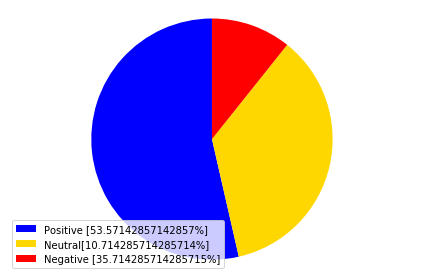

In [134]:
import matplotlib.pyplot as plt
positiv=((positive)/(positive+neutral+negative))*100
negativ=((negative)/(positive+neutral+negative))*100
neutra=((neutral)/(positive+neutral+negative))*100

labels=['Positive ['+str(positiv)+'%]','Neutral['+str(neutra)+'%]','Negative ['+str(negativ)+'%]']
sizes=[positiv,negativ,neutra]
colors=['blue','gold','red']
patches,texts=plt.pie(sizes,colors=colors,startangle=90)
plt.legend(patches,labels,loc='best')
plt.axis('equal')
plt.tight_layout()
plt.show()

Text(0.5, 0, 'posts')

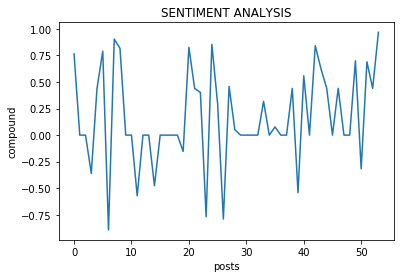

In [142]:
plt.plot(arr, label='sentiment')
plt.title('SENTIMENT ANALYSIS')
plt.ylabel('compound')
plt.xlabel('posts')

In [165]:
positive=0
negative=0
neutral=0
arr=[]
for i in range(num_of_names):
    comment = sub[i].text
    comment=comment.lower()
    comment=comment.replace('\n', '')
    docs=comment.split('\n')
    
    words=nltk.tokenize.word_tokenize(docs[0])
    allowed_tags=['VBP','VB','VBG','JJ','NN','RB']
    
    from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
    from string import punctuation as punc
    
    pdocs=[]
    for d in docs:
        words=nltk.tokenize.word_tokenize(d)
        words_tags=nltk.pos_tag(words)
        
        for w,t in words_tags:
            if w in punc:
                words.remove(w)
            elif w in ENGLISH_STOP_WORDS:
                words.remove(w)
            elif t not in allowed_tags:
                words.remove(w)
        pd=' '.join(words)
        if pd=='':
            pdocs.append('0')
        pdocs.append(pd)
    
    from sklearn.feature_extraction.text import CountVectorizer
    vec=CountVectorizer()
    matrix_X=vec.fit_transform(pdocs)
    
    #LDA TOPIC MODELLING
    features=vec.get_feature_names()
    from sklearn.decomposition import LatentDirichletAllocation
    lda=LatentDirichletAllocation(n_components=5)
    lda.fit(matrix_X)
    
    
    from nltk.sentiment.vader import SentimentIntensityAnalyzer
    
    sid=SentimentIntensityAnalyzer()
    
    print('ACTUAL REVIEW')
    print(comment)
    print(''*100)
    for i in pdocs:
        
        ss=sid.polarity_scores(i)
        print('SUMMARY')
        print(i)
        print(''*100)
        for k in ss:
            print(k,ss[k])
        arr.append(ss['compound'])
        if(ss['compound']>=0.05):
            positive+=1
            print("Positive Sentiment")
        elif(ss['compound']<=-0.05):
            negative+=1
            print("negative Sentiment")
        else:
            neutral+=1
            print("Neutral Sentiment")
   
    print(''*100)
    print('KEYWORDS')
    for tid,topics in enumerate(lda.components_):
        top_words=[features[i] for i in topics.argsort()[:-10:-1]]
        print(top_words)
        
        
        
        break
    print('-'*100)

ACTUAL REVIEW
very good staff. very cooperative. testing charges are as per the industry standard. but when you get admitted, they might drag the treatment process and charge you more which any hospital does. so be smart, take a person with good knowledge about the disease or process in order to but get cheated.but if you have no issues with money, then without any doubt this is the best hospital you can get for treatment.

SUMMARY
good staff cooperative testing industry standard drag treatment process charge hospital smart person good knowledge disease process order cheated.but money doubt hospital treatment

neg 0.142
neu 0.583
pos 0.275
compound 0.6249
Positive Sentiment

KEYWORDS
['treatment', 'hospital', 'process', 'good', 'charge', 'cheated', 'cooperative', 'disease', 'doubt']
----------------------------------------------------------------------------------------------------
ACTUAL REVIEW
kims hospital is part kiit university,  based at bhubaneswar. there is medical oncology uni

ACTUAL REVIEW
kalinga institute of medical sciences (kims) a constituent of kiit, offers a unique combination of experience and expertise. located in an ultra-modern and eco-friendly campus, it has two wings – the hospital and the medical college (for mbbs & m.d. courses). ‘the medical college’ offers mbbs course at the undergraduate level with an annual intake of 100 students as well as m.d. course at postgraduate level. a high academic standard is maintained by an experienced  and  dedicated team of professors, clinicians and scientists, who are engaged in teaching research and developing technologies in health  care. the courses are approved by the ministry of health and family welfare, government of india and the medical council of india (mci). the medical college has 21 academic departments, providing the study, treatment and prevention of human diseases and maternity care.

SUMMARY
kalinga institute medical constituent kiit unique combination experience expertise ultra-modern eco

ACTUAL REVIEW
it is a very good hospital for sarjari

SUMMARY
good hospital sarjari

neg 0.0
neu 0.408
pos 0.592
compound 0.4404
Positive Sentiment

KEYWORDS
['sarjari', 'hospital', 'good']
----------------------------------------------------------------------------------------------------
ACTUAL REVIEW
kalinga institute of medical science is very neat and clean her all the time. neat clean nice parking. services  times so good. wheelchairs available and ambulance in 24 hours service in front of the hospitals. in the hospital area lots of …

SUMMARY
kalinga institute medical science neat clean time neat clean nice parking good available ambulance service hospital area …

neg 0.0
neu 0.391
pos 0.609
compound 0.9442
Positive Sentiment

KEYWORDS
['time', 'service', 'science', 'parking', 'nice', 'medical', 'kalinga', 'institute', 'hospital']
----------------------------------------------------------------------------------------------------
ACTUAL REVIEW
nice behavior & good treatments for

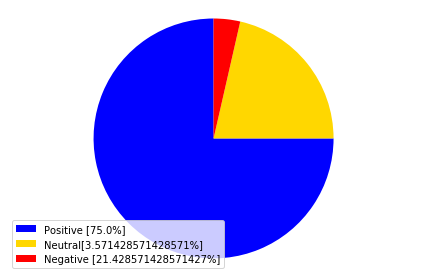

In [154]:
import matplotlib.pyplot as plt
positiv=((positive)/(positive+neutral+negative))*100
negativ=((negative)/(positive+neutral+negative))*100
neutra=((neutral)/(positive+neutral+negative))*100

labels=['Positive ['+str(positiv)+'%]','Neutral['+str(neutra)+'%]','Negative ['+str(negativ)+'%]']
sizes=[positiv,negativ,neutra]
colors=['blue','gold','red']
patches,texts=plt.pie(sizes,colors=colors,startangle=90)
plt.legend(patches,labels,loc='best')
plt.axis('equal')
plt.tight_layout()
plt.show()

Text(0.5, 0, 'posts')

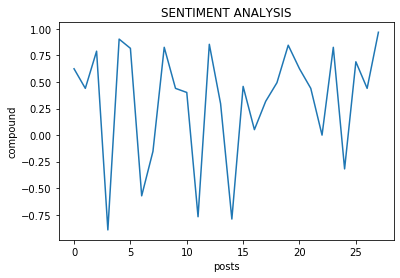

In [155]:
plt.plot(arr, label='sentiment')
plt.title('SENTIMENT ANALYSIS')
plt.ylabel('compound')
plt.xlabel('posts')